In [4]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from rlxutils import subplots

sys.path.append("..")
from lib import io

In [46]:
def plot_amplitude(x, date="", pol=""):
    vmin, vmax = np.percentile(x, [1,99])
    plt.imshow(x, vmin=vmin, vmax=vmax)
    plt.colorbar()
    plt.title(f"amplitude {date} {pol}")
    

def plot_slc(amplitude, phase, date="", pol=""):
    for ax,i in subplots(2, usizex=6.5, usizey=2.5):
        if i==0:
            plot_amplitude(amplitude, date, pol)
        if i==1:
            plt.imshow(phase)
            plt.title(f"phase {date} {pol}")
            plt.colorbar()
            
def plot_hist(x, pmin=1, pmax=99, **kwargs):
    qmin, qmax = np.percentile(x, [pmin, pmax])
    x = x.flatten()
    x = x[(x>qmin)&(x<qmax)]
    plt.hist(x, **kwargs)

## load two consecutive SLCs from Barcelona dataset

In [41]:
base_path = "/home/rlx/data/sar-recovery"

# load HH from two consecutive imgs
date0, date1 = '20100520', '20100613'
shh0 = io.load_bcn_slc(base_path, date0, 'HH')
shv0 = io.load_bcn_slc(base_path, date0, 'HV')
svh0 = io.load_bcn_slc(base_path, date0, 'VH')
svv0 = io.load_bcn_slc(base_path, date0, 'VV')

shh1 = io.load_bcn_slc(base_path, date1, 'HH')


## quadpol amplitude from same date

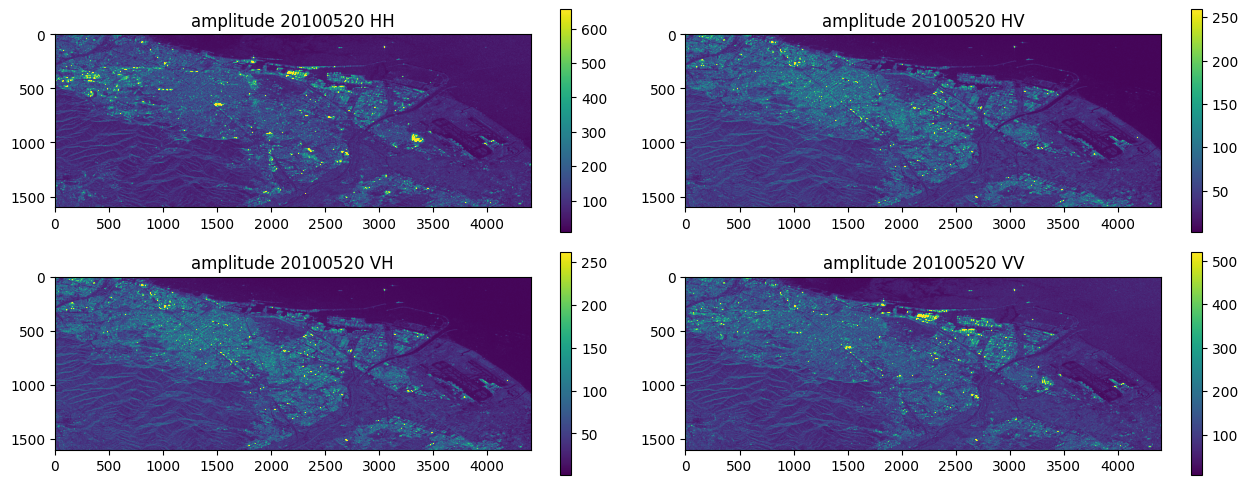

In [54]:
for ax, i in subplots(4, n_cols=2, usizex=6.5, usizey=2.5):
    
    if i==0: x, pol = np.abs(shh0).T, 'HH'
    if i==1: x, pol = np.abs(shv0).T, 'HV'
    if i==2: x, pol = np.abs(svh0).T, 'VH'
    if i==3: x, pol = np.abs(svv0).T, 'VV'
    
    plot_amplitude(x, date0, pol)

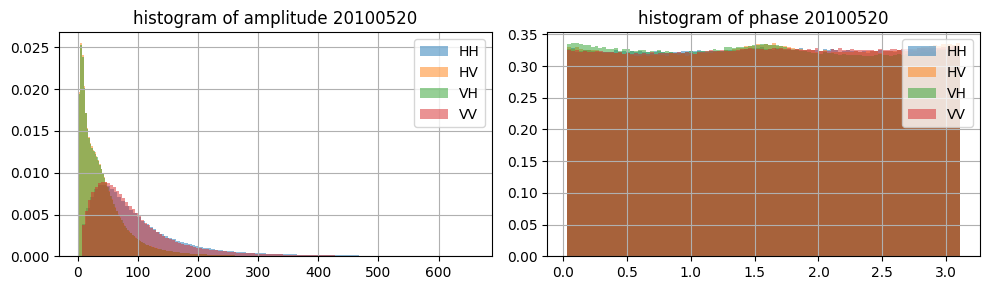

In [59]:
for ax, ii in subplots(2, n_cols=2, usizex=5, usizey=3):
    
    if ii==0: f,t = np.abs, "amplitude"
    if ii==1: f,t = np.angle, "phase"
    
    for i in range(4):

        if i==0: x, pol = f(shh0).T, 'HH'
        if i==1: x, pol = f(shv0).T, 'HV'
        if i==2: x, pol = f(svh0).T, 'VH'
        if i==3: x, pol = f(svv0).T, 'VV'

        plot_hist(np.abs(x), bins=100, density=True, alpha=.5, label=pol)

    plt.grid()
    plt.legend()
    plt.title(f"histogram of {t} {date0}");


## HH from two consecutive days

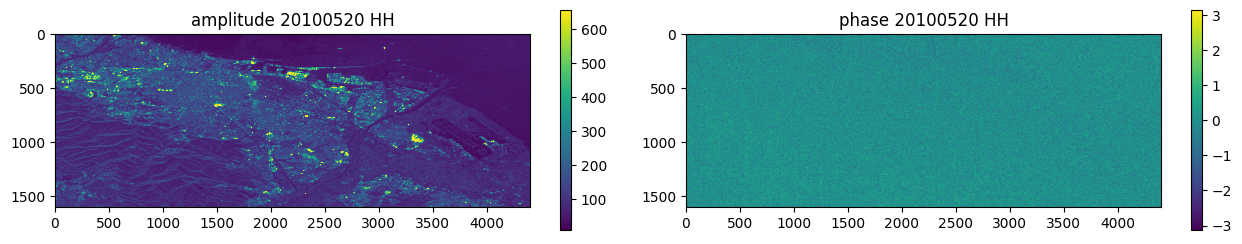

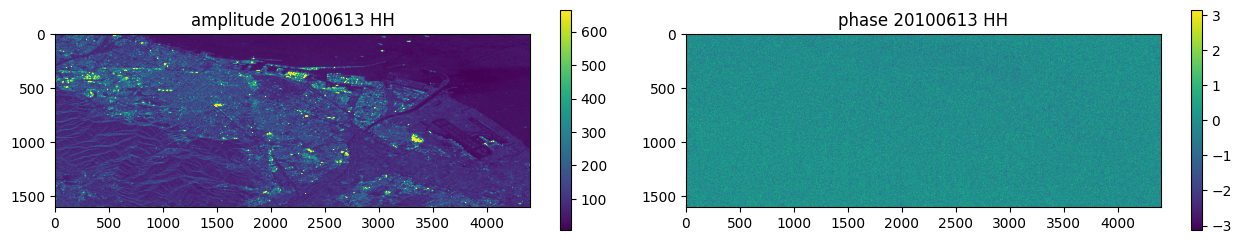

In [45]:
plot_slc(np.abs(shh0).T, np.angle(shh0).T, date0, 'HH')
plot_slc(np.abs(shh1).T, np.angle(shh1).T, date1, 'HH')


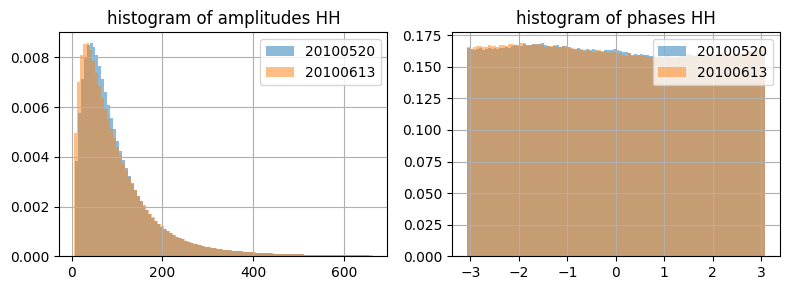

In [53]:
for ax,i in subplots(2, usizex=4):
    if i==0:
        plot_hist(np.abs(shh0), bins=100, density=True, alpha=.5, label=date0)
        plot_hist(np.abs(shh1), bins=100, density=True, alpha=.5, label=date1)
        plt.grid()
        plt.legend()
        plt.title("histogram of amplitudes HH");
    if i==1:
        plot_hist(np.angle(shh0), bins=100, density=True, alpha=.5, label=date0)
        plot_hist(np.angle(shh1), bins=100, density=True, alpha=.5, label=date1)
        plt.grid()
        plt.legend()
        plt.title("histogram of phases HH");

## correlations between channels on the same date

In [131]:
w,h = shh0.shape
n_samples = 1000

ci = (np.random.random(size=shh0.shape)<0.001)*1
print(f"selecting {ci.sum()} random pixels")

xhh = shh0[ci==1]
xhv = shv0[ci==1]
xvh = svh0[ci==1]
xvv = svv0[ci==1]

selecting 7070 random pixels


### correlations in amplitude

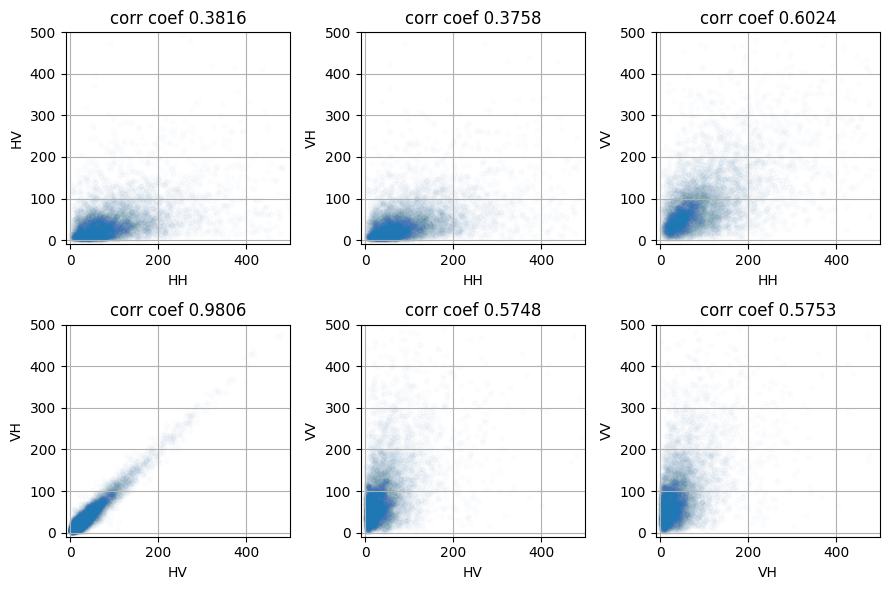

In [139]:
for ax,i in subplots(6, n_cols=3):
    if i==0: x,y,xl,yl = np.abs(xhh), np.abs(xhv), "HH", "HV"
    if i==1: x,y,xl,yl = np.abs(xhh), np.abs(xvh), "HH", "VH"
    if i==2: x,y,xl,yl = np.abs(xhh), np.abs(xvv), "HH", "VV"
    if i==3: x,y,xl,yl = np.abs(xhv), np.abs(xvh), "HV", "VH"
    if i==4: x,y,xl,yl = np.abs(xhv), np.abs(xvv), "HV", "VV"
    if i==5: x,y,xl,yl = np.abs(xvh), np.abs(xvv), "VH", "VV"
    
    cc = np.corrcoef(x,y)[0,1]
    
    plt.scatter(x,y, s=10, alpha=.01)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.xlim(-10,500)
    plt.ylim(-10,500)
    plt.grid()
    plt.title(f"corr coef {cc:.4f}")

### correlations in phase

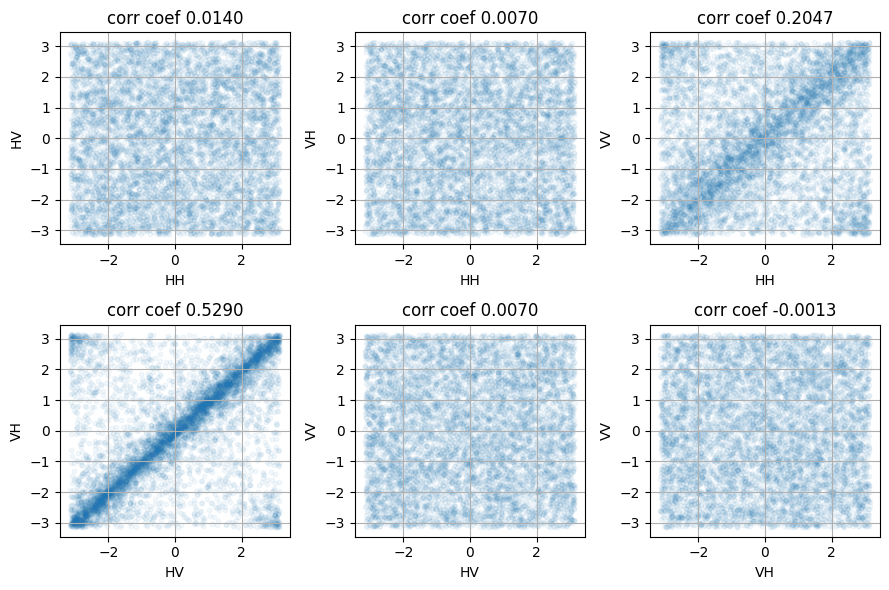

In [140]:
for ax,i in subplots(6, n_cols=3):
    if i==0: x,y,xl,yl = np.angle(xhh), np.angle(xhv), "HH", "HV"
    if i==1: x,y,xl,yl = np.angle(xhh), np.angle(xvh), "HH", "VH"
    if i==2: x,y,xl,yl = np.angle(xhh), np.angle(xvv), "HH", "VV"
    if i==3: x,y,xl,yl = np.angle(xhv), np.angle(xvh), "HV", "VH"
    if i==4: x,y,xl,yl = np.angle(xhv), np.angle(xvv), "HV", "VV"
    if i==5: x,y,xl,yl = np.angle(xvh), np.angle(xvv), "VH", "VV"
    
    
    cc = np.corrcoef(x,y)[0,1]
    
    plt.scatter(x,y, s=10, alpha=.05)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.grid()
    plt.title(f"corr coef {cc:.4f}")